In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Primeare league matches.csv')
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [3]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [4]:
df.tail()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City
4787,91,2020-07-26,16:00 (17:00),Premier League,Matchweek 38,Sun,Away,L,0,5,...,Match Report,NaN,5,4,19.8,0,0,0,2020,Norwich City


In [6]:
df.tail(8)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
4780,83,2020-06-24,18:00 (19:00),Premier League,Matchweek 31,Wed,Home,L,0,1,...,Match Report,NaN,9,1,23.7,1,0,0,2020,Norwich City
4781,85,2020-07-01,18:00 (19:00),Premier League,Matchweek 32,Wed,Away,L,0,4,...,Match Report,NaN,8,2,30.7,1,0,0,2020,Norwich City
4782,86,2020-07-04,12:30 (13:30),Premier League,Matchweek 33,Sat,Home,L,0,1,...,Match Report,NaN,12,1,18.4,0,0,0,2020,Norwich City
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City
4787,91,2020-07-26,16:00 (17:00),Premier League,Matchweek 38,Sun,Away,L,0,5,...,Match Report,NaN,5,4,19.8,0,0,0,2020,Norwich City


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [8]:
df.shape

(4788, 28)

In [6]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0        date           time            comp         round  \
0              0  2020-09-21  20:15 (21:15)  Premier League   Matchweek 2   
1              2  2020-09-27  16:30 (17:30)  Premier League   Matchweek 3   
2              4  2020-10-03  17:30 (18:30)  Premier League   Matchweek 4   
3              5  2020-10-17  17:30 (18:30)  Premier League   Matchweek 5   
4              7  2020-10-24  12:30 (13:30)  Premier League   Matchweek 6   
...          ...         ...            ...             ...           ...   
4783          87  2020-07-07  18:00 (19:00)  Premier League  Matchweek 34   
4784          88  2020-07-11  12:30 (13:30)  Premier League  Matchweek 35   
4785          89  2020-07-14  20:15 (21:15)  Premier League  Matchweek 36   
4786          90  2020-07-18  17:30 (18:30)  Premier League  Matchweek 37   
4787          91  2020-07-26  16:00 (17:00)  Premier League  Matchweek 38   

      day venue result  gf  ga  ...  matc

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4788.0,63.044069,42.865191,0.0,28.0,62.0,87.0,182.0
gf,4788.0,1.447995,1.312635,0.0,0.0,1.0,2.0,9.0
ga,4788.0,1.405388,1.286927,0.0,0.0,1.0,2.0,9.0
xg,4788.0,1.396512,0.828847,0.0,0.8,1.3,1.9,7.0
xga,4788.0,1.364745,0.814947,0.0,0.7,1.2,1.8,7.0
poss,4788.0,50.432957,12.810958,18.0,41.0,51.0,60.0,82.0
attendance,3155.0,38397.586688,17595.849137,2000.0,25513.5,36347.0,53235.5,75546.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4788.0,12.619256,5.548444,0.0,9.0,12.0,16.0,36.0
sot,4788.0,4.261278,2.459963,0.0,2.0,4.0,6.0,15.0


In [8]:
df.isnull().sum()  # mising data show

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [9]:
df = df.drop('notes', axis=1)  # Drop the 'notes' column

In [10]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City


In [11]:
df.isnull().sum()  # mising data show

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [12]:
df['attendance']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4783   NaN
4784   NaN
4785   NaN
4786   NaN
4787   NaN
Name: attendance, Length: 4788, dtype: float64

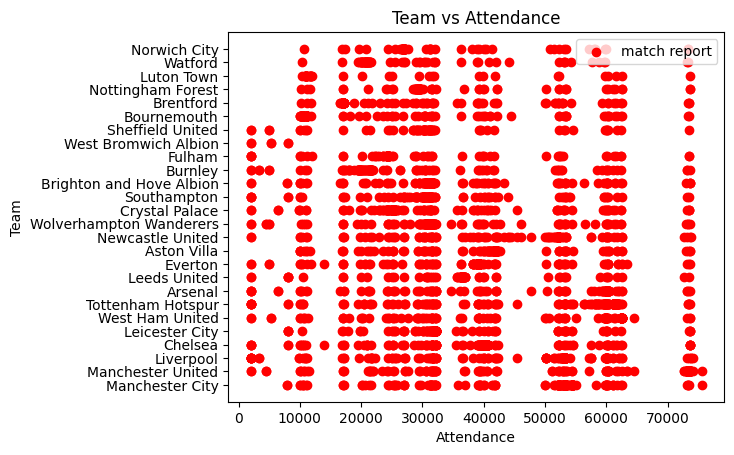

In [13]:
plt.scatter(df.attendance, df.team, marker='o', color='red', label='match report')
plt.xlabel('Attendance')
plt.ylabel('Team')
plt.title('Team vs Attendance')
plt.legend()

In [14]:
x = df['team']
y = df['attendance']

In [15]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City


In [16]:
x.head()

0    Manchester City
1    Manchester City
2    Manchester City
3    Manchester City
4    Manchester City
Name: team, dtype: object

In [17]:
y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: attendance, dtype: float64

In [18]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')     # data format a convert korcay.
numeric_columns = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']   # newmaric coloums gulo akta list koray numeric_columns store kortayci.
for col in numeric_columns: 
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ai line ar portikti coloums numeric_columns a convert kora hoicay. j golu vul data and non newmarik data acay segulo not a number hisabay setkora hoscay.

In [23]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

# [Link](https://prnt.sc/pe7RRrmCjyMh)

In [24]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df.describe()

,Unnamed: 0,date,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,2021-10-14 00:14:08.120300800,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
min,0.000000,2019-08-09 00:00:00,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,2020-10-24 00:00:00,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,2021-05-13 00:00:00,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2022-12-31 00:00:00,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,2024-05-19 00:00:00,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000
std,42.865191,NaN,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,5.548444,2.459963,3.048704,0.665250,0.342362,0.37937,1.461850


In [25]:
a=df["attendance"].mean()
df["attendance"].fillna(a,inplace=True)
df.isnull().sum()

Unnamed: 0      0
date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64

In [26]:
as_df =df.fillna(0)    # sob gulo notes 0 dara filup hobay.
as_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Anthony Taylor,Match Report,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Kevin Friend,Match Report,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Jonathan Moss,Match Report,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Kevin Friend,Match Report,6,2,13.4,0,0,0,2020,Norwich City


Analyze the frequency distribution of unique values in some text columns

In [28]:
print("Distribution of competitions:")
print(df['comp'].value_counts())

Distribution of competitions:
comp
Premier League    4788
Name: count, dtype: int64


In [29]:
print("Distribution of rounds:")
print(df['round'].value_counts())

Distribution of rounds:
round
Matchweek 2     126
Matchweek 33    126
Matchweek 23    126
Matchweek 24    126
Matchweek 16    126
Matchweek 25    126
Matchweek 26    126
Matchweek 29    126
Matchweek 27    126
Matchweek 28    126
Matchweek 3     126
Matchweek 30    126
Matchweek 31    126
Matchweek 32    126
Matchweek 34    126
Matchweek 35    126
Matchweek 36    126
Matchweek 37    126
Matchweek 22    126
Matchweek 21    126
Matchweek 20    126
Matchweek 1     126
Matchweek 4     126
Matchweek 5     126
Matchweek 6     126
Matchweek 7     126
Matchweek 8     126
Matchweek 9     126
Matchweek 10    126
Matchweek 11    126
Matchweek 12    126
Matchweek 13    126
Matchweek 14    126
Matchweek 15    126
Matchweek 17    126
Matchweek 18    126
Matchweek 19    126
Matchweek 38    126
Name: count, dtype: int64


In [30]:
print("Distribution of venues:")
print(df['venue'].value_counts())

Distribution of venues:
venue
Away    2394
Home    2394
Name: count, dtype: int64


In [31]:
print("Distribution of captains:")
print(df['captain'].value_counts())

Distribution of captains:
captain
Lewis Dunk           200
Kasper Schmeichel    181
Hugo Lloris          179
James Ward-Prowse    162
César Azpilicueta    160
                    ... 
Ezri Konsa             1
Yerry Mina             1
Asmir Begović          1
Jack Cork              1
Timm Klose             1
Name: count, Length: 178, dtype: int64


In [32]:
print("Distribution of referees:")
print(df['referee'].value_counts())

Distribution of referees:
referee
Anthony Taylor       371
Michael Oliver       359
Paul Tierney         316
Craig Pawson         284
Stuart Attwell       269
Chris Kavanagh       261
Martin Atkinson      240
David Coote          236
Andre Marriner       229
Mike Dean            225
Jonathan Moss        219
Andy Madley          215
Simon Hooper         208
Kevin Friend         197
Peter Bankes         173
Robert Jones         158
Graham Scott         149
Darren England       136
Jarred Gillett        94
John Brooks           90
Lee Mason             85
Michael Salisbury     64
Tim Robinson          48
Thomas Bramall        38
Tony Harrington       38
Samuel Barrott        30
Darren Bond           18
Joshua Smith          10
Samuel Allison         6
Oliver Langford        4
Lewis Smith            4
Robert Madley          4
Rebecca Welch          4
Matt Donohue           4
Sunny Singh            2
Name: count, dtype: int64


In [33]:
results_distribution = df['result'].value_counts(normalize=True) * 100
print("Results distribution (Win, Loss, Draw):")
print(results_distribution)

Results distribution (Win, Loss, Draw):
result
W    39.578112
L    38.011696
D    22.410192
Name: proportion, dtype: float64


In [34]:
venue_grouped = df.groupby('venue')['gf'].agg(['mean', 'std', 'count'])
print("Goals statistics by venue:")
print(venue_grouped)

Goals statistics by venue:
           mean       std  count
venue                           
Away   1.336257  1.257873   2394
Home   1.559733  1.356287   2394


In [35]:
referee_grouped = df.groupby('referee')['gf'].agg(['mean', 'std', 'count'])
print("Goals statistics by referee:")
print(referee_grouped)

Goals statistics by referee:
                       mean       std  count
referee                                     
Andre Marriner     1.502183  1.473820    229
Andy Madley        1.483721  1.446383    215
Anthony Taylor     1.541779  1.269286    371
Chris Kavanagh     1.398467  1.244309    261
Craig Pawson       1.394366  1.304831    284
Darren Bond        1.333333  1.371989     18
Darren England     1.441176  1.359546    136
David Coote        1.368644  1.222011    236
Graham Scott       1.389262  1.277198    149
Jarred Gillett     1.638298  1.310430     94
John Brooks        1.244444  1.173788     90
Jonathan Moss      1.529680  1.411871    219
Joshua Smith       1.700000  1.494434     10
Kevin Friend       1.406091  1.316134    197
Lee Mason          1.400000  1.338087     85
Lewis Smith        1.500000  1.290994      4
Martin Atkinson    1.275000  1.337971    240
Matt Donohue       2.250000  1.258306      4
Michael Oliver     1.676880  1.273404    359
Michael Salisbury  1.56250

In [36]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0      0
date            0
time            0
comp            0
round           0
day             0
venue           0
result          0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance      0
captain         0
formation       0
referee         0
match report    0
sh              0
sot             0
dist            0
fk              0
pk              0
pkatt           0
season          0
team            0
dtype: int64


In [37]:
missing_percentage = (missing_values / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Unnamed: 0      0.0
date            0.0
time            0.0
comp            0.0
round           0.0
day             0.0
venue           0.0
result          0.0
gf              0.0
ga              0.0
opponent        0.0
xg              0.0
xga             0.0
poss            0.0
attendance      0.0
captain         0.0
formation       0.0
referee         0.0
match report    0.0
sh              0.0
sot             0.0
dist            0.0
fk              0.0
pk              0.0
pkatt           0.0
season          0.0
team            0.0
dtype: float64


In [38]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
print(numeric_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4788 non-null   int64  
 1   gf          4788 non-null   int64  
 2   ga          4788 non-null   int64  
 3   xg          4788 non-null   float64
 4   xga         4788 non-null   float64
 5   poss        4788 non-null   int64  
 6   attendance  4788 non-null   float64
 7   sh          4788 non-null   int64  
 8   sot         4788 non-null   int64  
 9   dist        4788 non-null   float64
 10  fk          4788 non-null   int64  
 11  pk          4788 non-null   int64  
 12  pkatt       4788 non-null   int64  
 13  season      4788 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 523.8 KB
None


In [39]:
numeric_df = numeric_df.dropna()
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
            Unnamed: 0        gf        ga        xg       xga      poss  \
Unnamed: 0    1.000000  0.047981 -0.071282  0.074707 -0.075725  0.114441   
gf            0.047981  1.000000 -0.155266  0.613499 -0.195942  0.179932   
ga           -0.071282 -0.155266  1.000000 -0.195575  0.610882 -0.177737   
xg            0.074707  0.613499 -0.195575  1.000000 -0.287240  0.366729   
xga          -0.075725 -0.195942  0.610882 -0.287240  1.000000 -0.367116   
poss          0.114441  0.179932 -0.177737  0.366729 -0.367116  1.000000   
attendance    0.054231  0.044442  0.034939  0.060971  0.045410  0.007462   
sh            0.058613  0.348860 -0.190601  0.691287 -0.332047  0.553565   
sot           0.055862  0.595544 -0.176655  0.652256 -0.246606  0.357195   
dist         -0.008739 -0.156897  0.029504 -0.283230  0.042788 -0.027326   
fk            0.028895  0.028671 -0.038478  0.089664 -0.092784  0.130683   
pk            0.001524  0.275390 -0.032454  0.334716 -0.068617  0.03

In [41]:
X = df[['poss', 'sh', 'sot']]  
y = df['xg']  
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.00072092  0.06976068  0.11259278]
Intercept: 0.07275317586850627


In [42]:
conditional_analysis = df.groupby(['venue', 'round'])['result'].value_counts(normalize=True)
print(conditional_analysis)

venue  round         result
Away   Matchweek 1   W         0.451613
                     L         0.419355
                     D         0.129032
       Matchweek 10  W         0.453125
                     L         0.359375
                                 ...   
Home   Matchweek 8   L         0.338710
                     D         0.225806
       Matchweek 9   W         0.437500
                     D         0.281250
                     L         0.281250
Name: proportion, Length: 228, dtype: float64


In [43]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df['gf'].resample('M').mean())

date
2019-08-31    1.555556
2019-09-30    1.759036
2019-10-31    1.512821
2019-11-30    1.553191
2019-12-31    1.484663
2020-01-31    1.383178
2020-02-29    1.311828
2020-03-31    1.312500
2020-04-30         NaN
2020-05-31         NaN
2020-06-30    1.272727
2020-07-31    1.630058
2020-08-31         NaN
2020-09-30    1.839286
2020-10-31    1.426471
2020-11-30    1.250000
2020-12-31    1.263158
2021-01-31    1.200000
2021-02-28    1.259615
2021-03-31    1.121212
2021-04-30    1.448718
2021-05-31    1.490196
2021-06-30         NaN
2021-07-31         NaN
2021-08-31    1.416667
2021-09-30    1.216667
2021-10-31    1.551282
2021-11-30    1.296875
2021-12-31    1.500000
2022-01-31    1.403226
2022-02-28    1.250000
2022-03-31    1.406250
2022-04-30    1.340000
2022-05-31    1.630952
2022-06-30         NaN
2022-07-31         NaN
2022-08-31    1.448980
2022-09-30    1.555556
2022-10-31    1.313559
2022-11-30    1.650000
2022-12-31    1.472222
2023-01-31    1.128571
2023-02-28    1.162500
2023-0

Information visualization

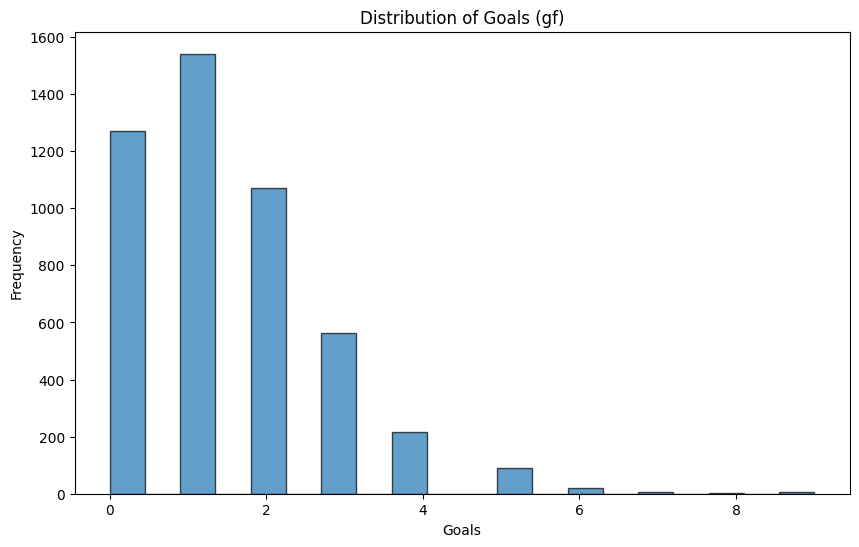

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['gf'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Goals (gf)')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

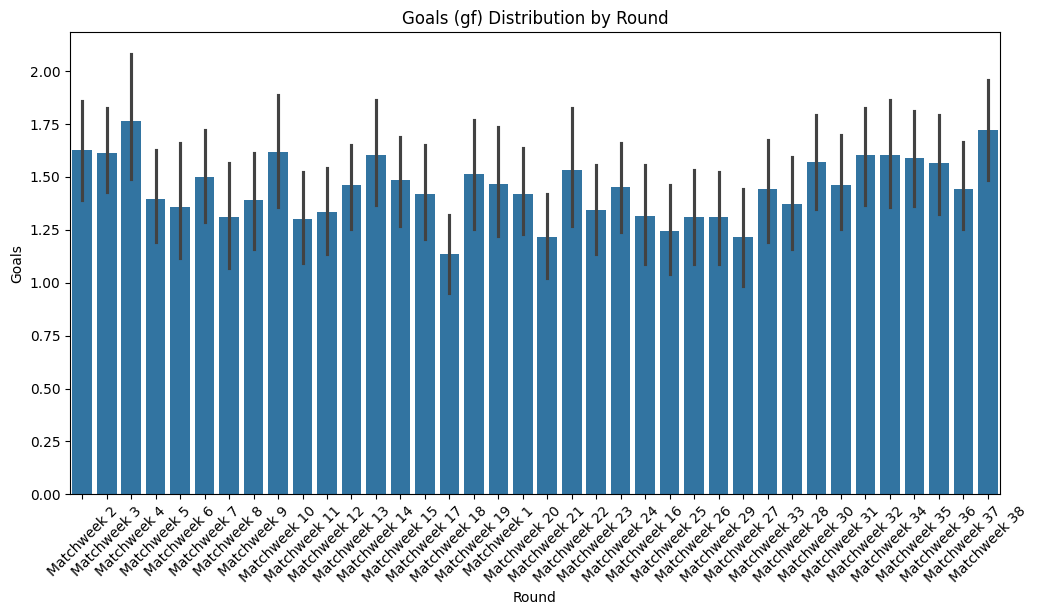

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='round', y='gf', data=df)
plt.title('Goals (gf) Distribution by Round')
plt.xlabel('Round')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x1000 with 0 Axes>

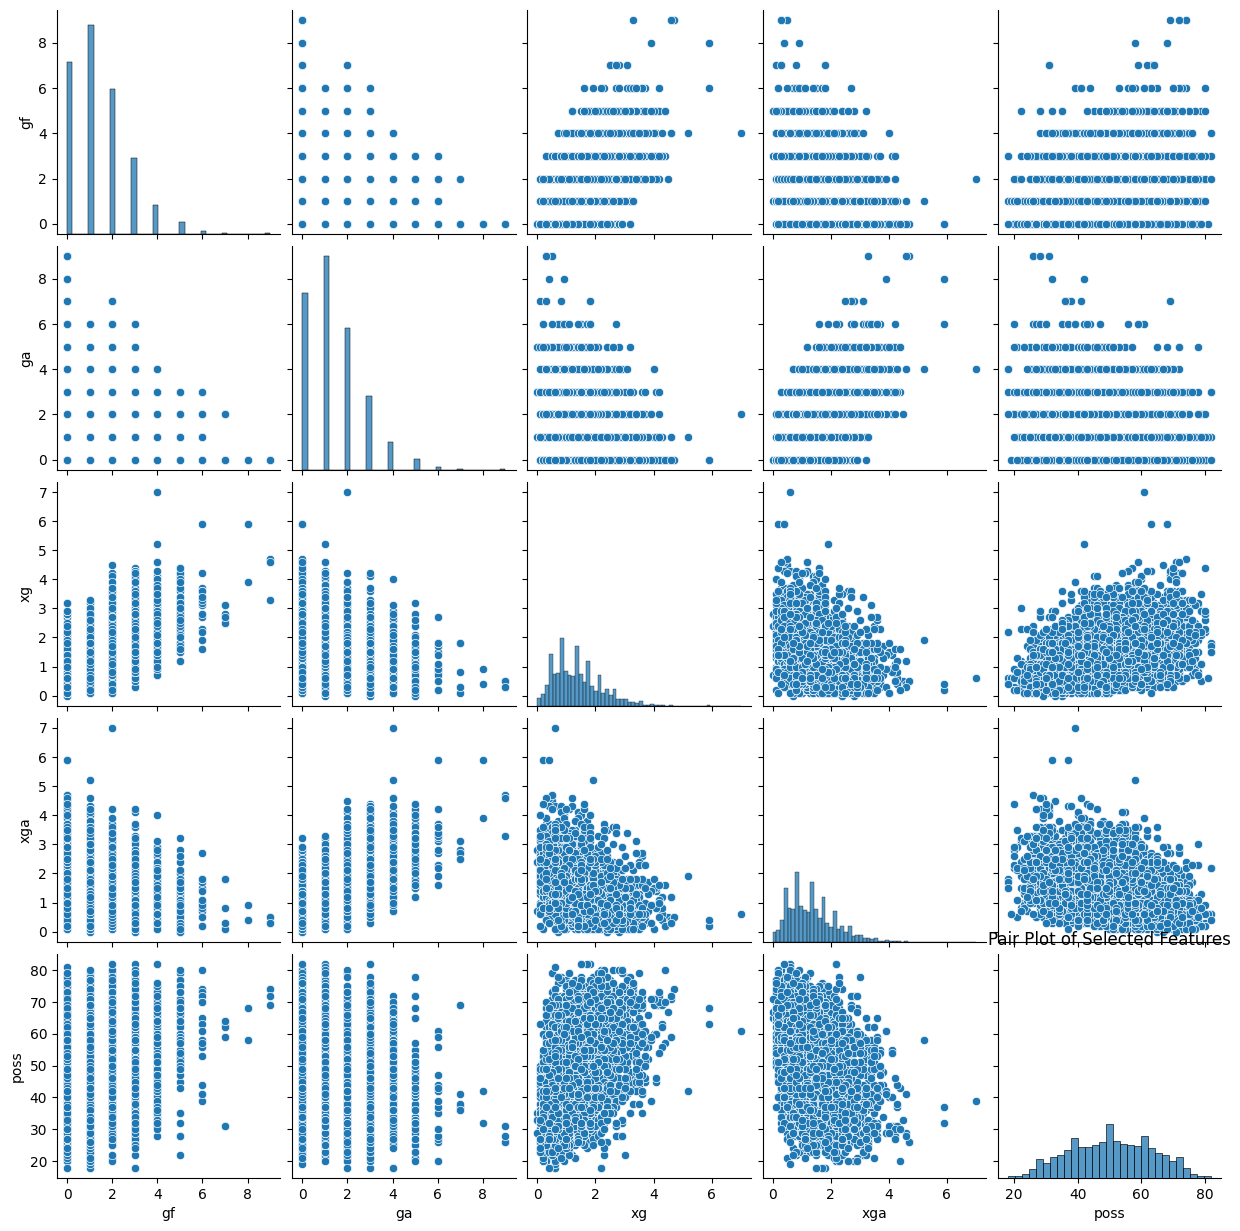

In [46]:
selected_features = df[['gf', 'ga', 'xg', 'xga', 'poss']]

plt.figure(figsize=(12, 10))
sns.pairplot(selected_features)
plt.title('Pair Plot of Selected Features')
plt.show()

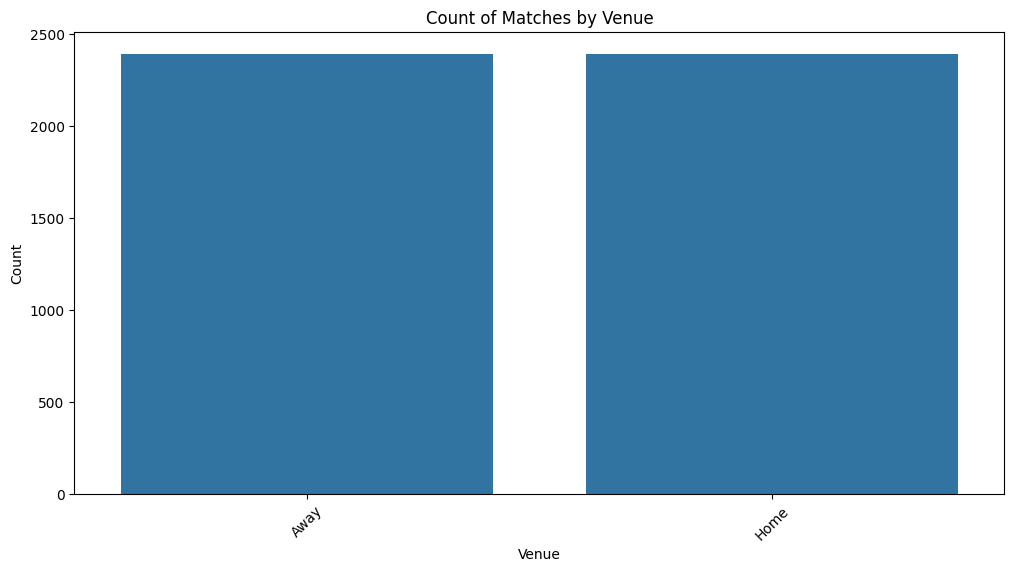

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=df, order=df['venue'].value_counts().index)
plt.title('Count of Matches by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

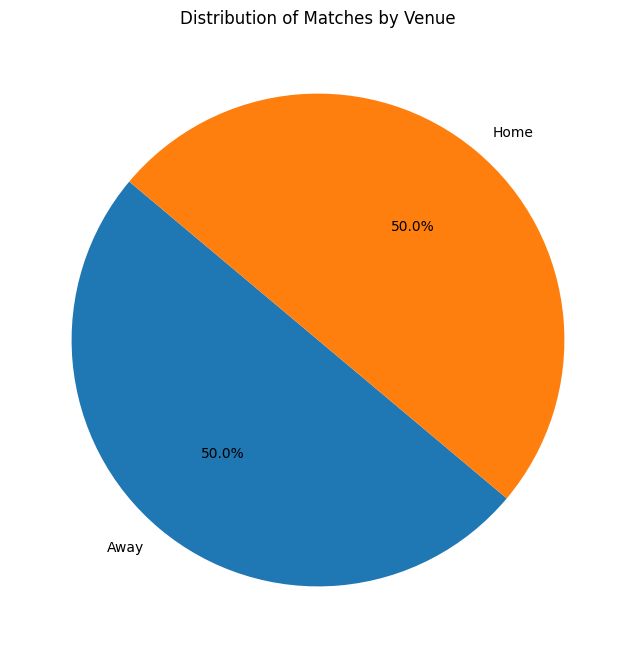

In [50]:
plt.figure(figsize=(8, 8))
venue_counts = df['venue'].value_counts()
plt.pie(venue_counts, labels=venue_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Matches by Venue')
plt.show()

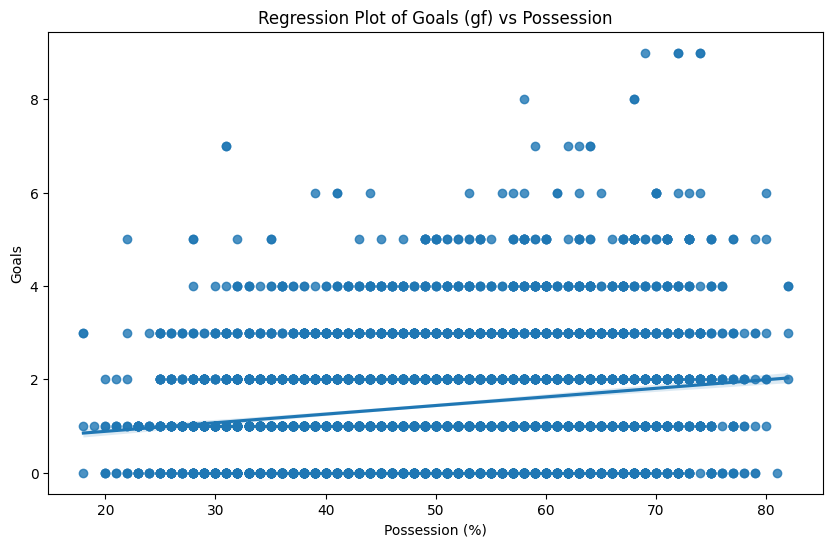

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='poss', y='gf', data=df)
plt.title('Regression Plot of Goals (gf) vs Possession')
plt.xlabel('Possession (%)')
plt.ylabel('Goals')
plt.show()

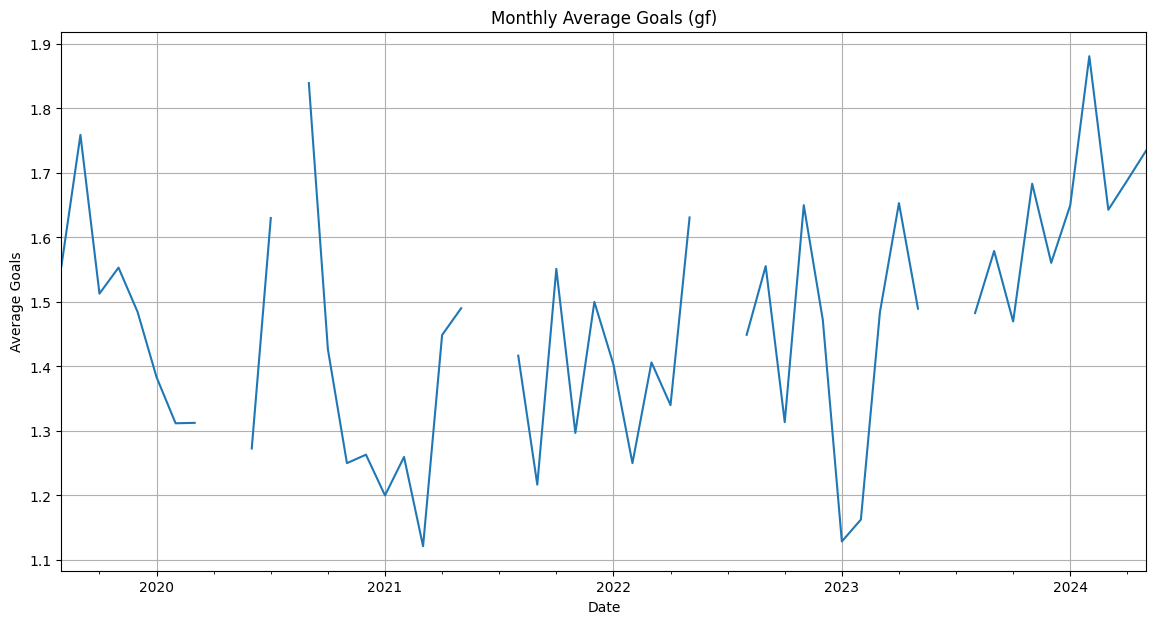

In [52]:
plt.figure(figsize=(14, 7))
df['gf'].resample('M').mean().plot()
plt.title('Monthly Average Goals (gf)')
plt.xlabel('Date')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()

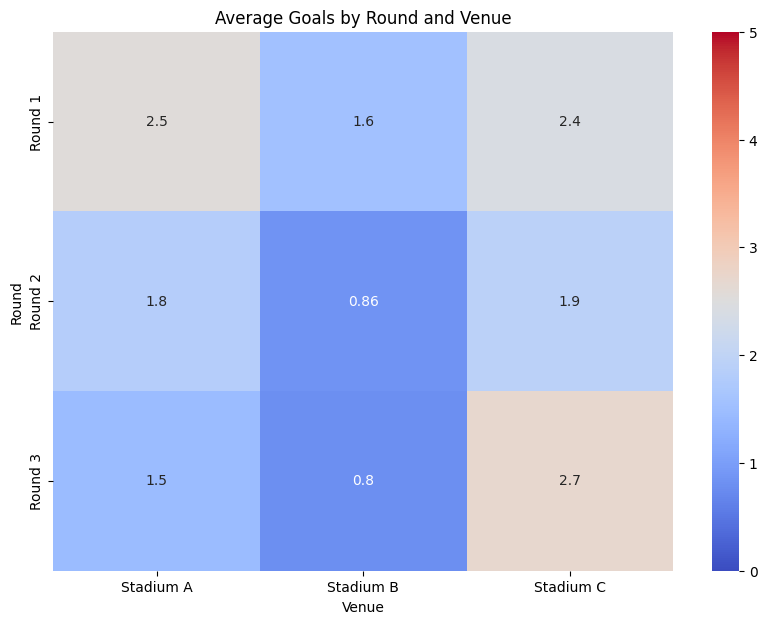

In [53]:
data = pd.DataFrame({
    'round': np.random.choice(['Round 1', 'Round 2', 'Round 3'], size=100),
    'venue': np.random.choice(['Stadium A', 'Stadium B', 'Stadium C'], size=100),
    'gf': np.random.randint(0, 5, size=100)
})
heatmap_data = data.pivot_table(index='round', columns='venue', values='gf', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=0, vmax=5)
plt.title('Average Goals by Round and Venue')
plt.xlabel('Venue')
plt.ylabel('Round')
plt.show()

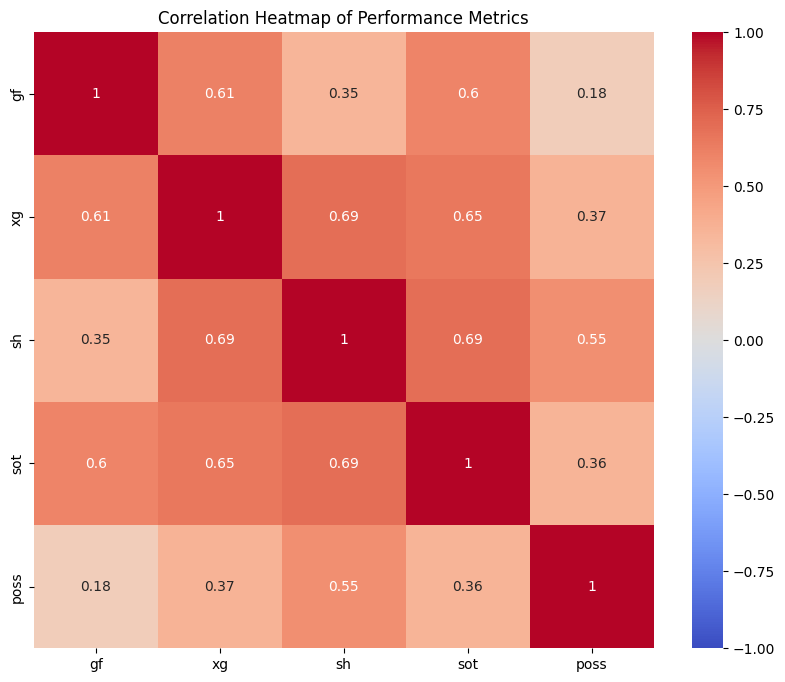

In [54]:
performance_data = df[['gf', 'xg', 'sh', 'sot', 'poss']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(performance_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()

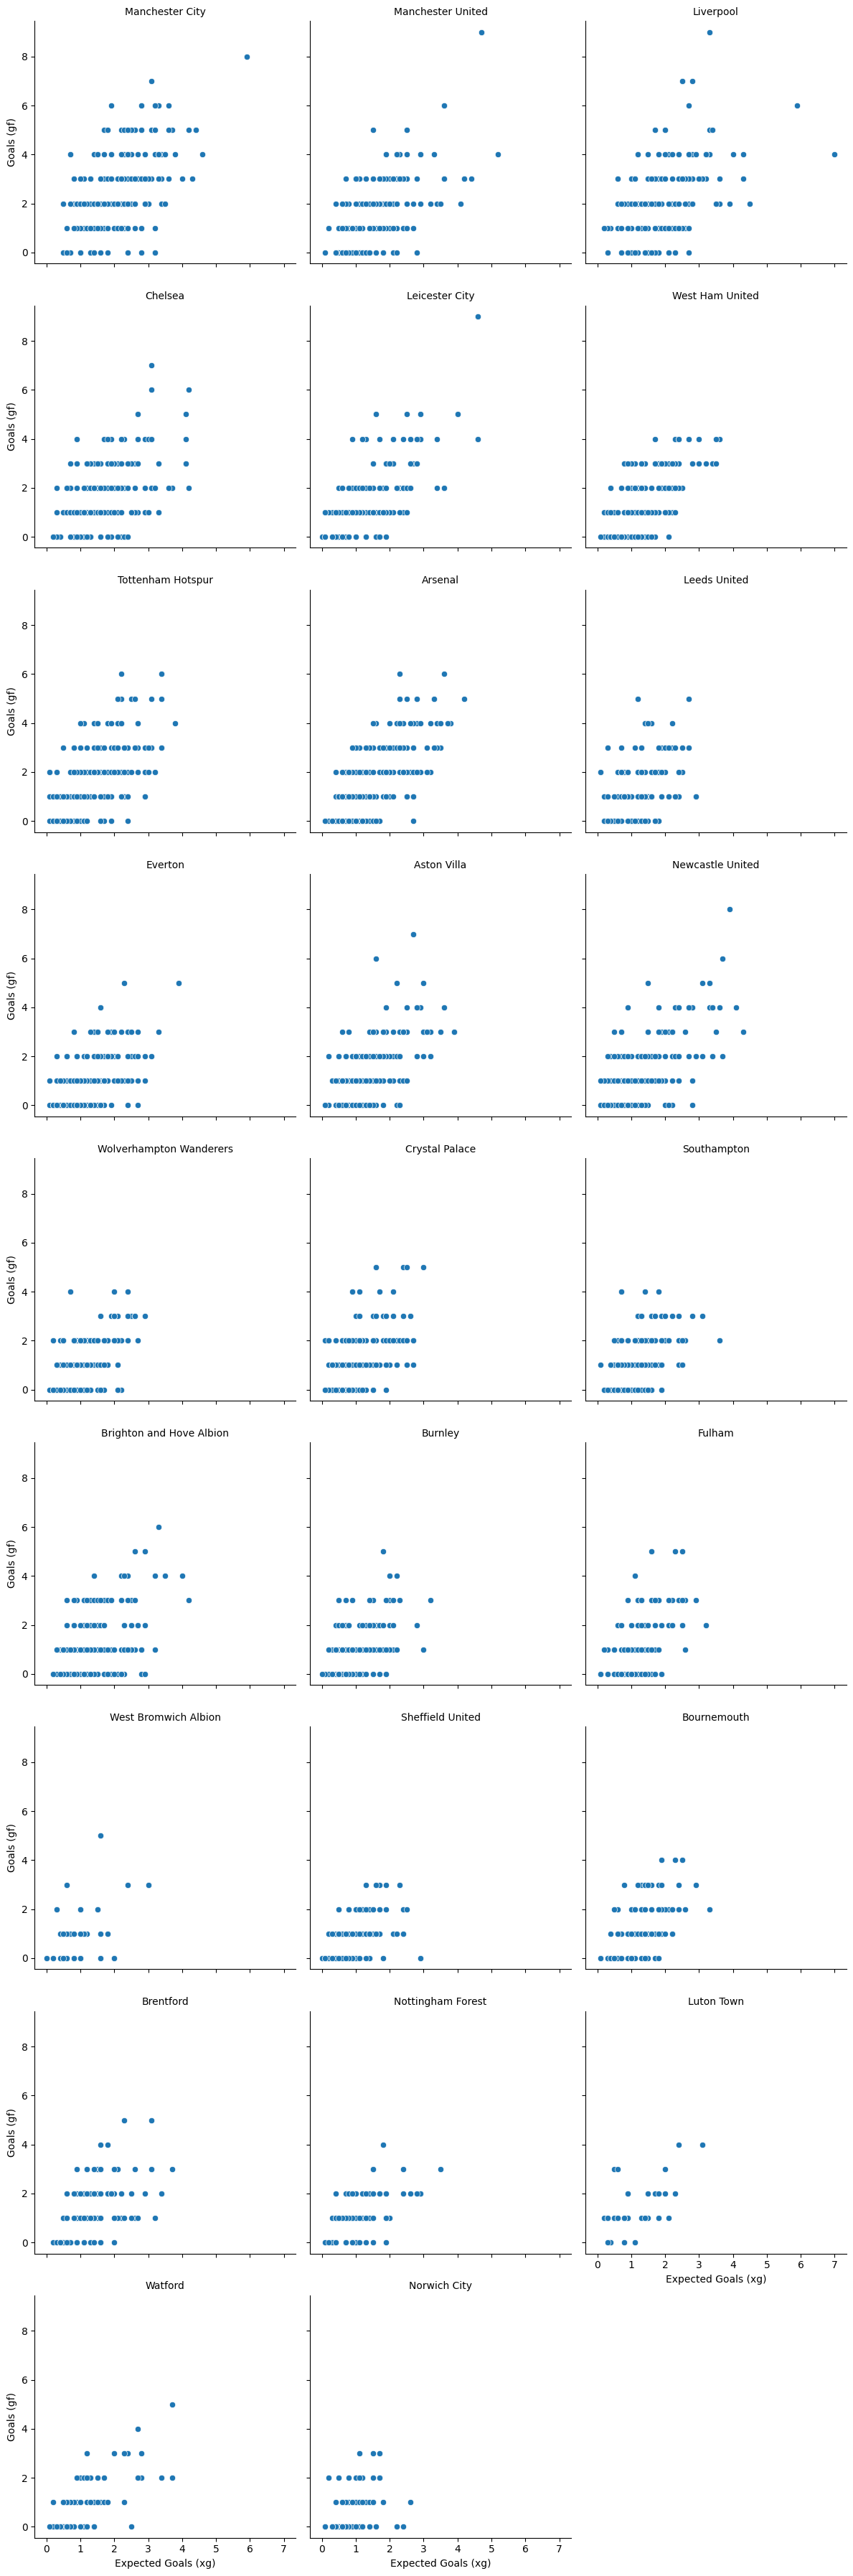

In [55]:
g = sns.FacetGrid(df, col='team', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='xg', y='gf')
g.set_axis_labels('Expected Goals (xg)', 'Goals (gf)')
g.set_titles(col_template="{col_name}")
plt.show()

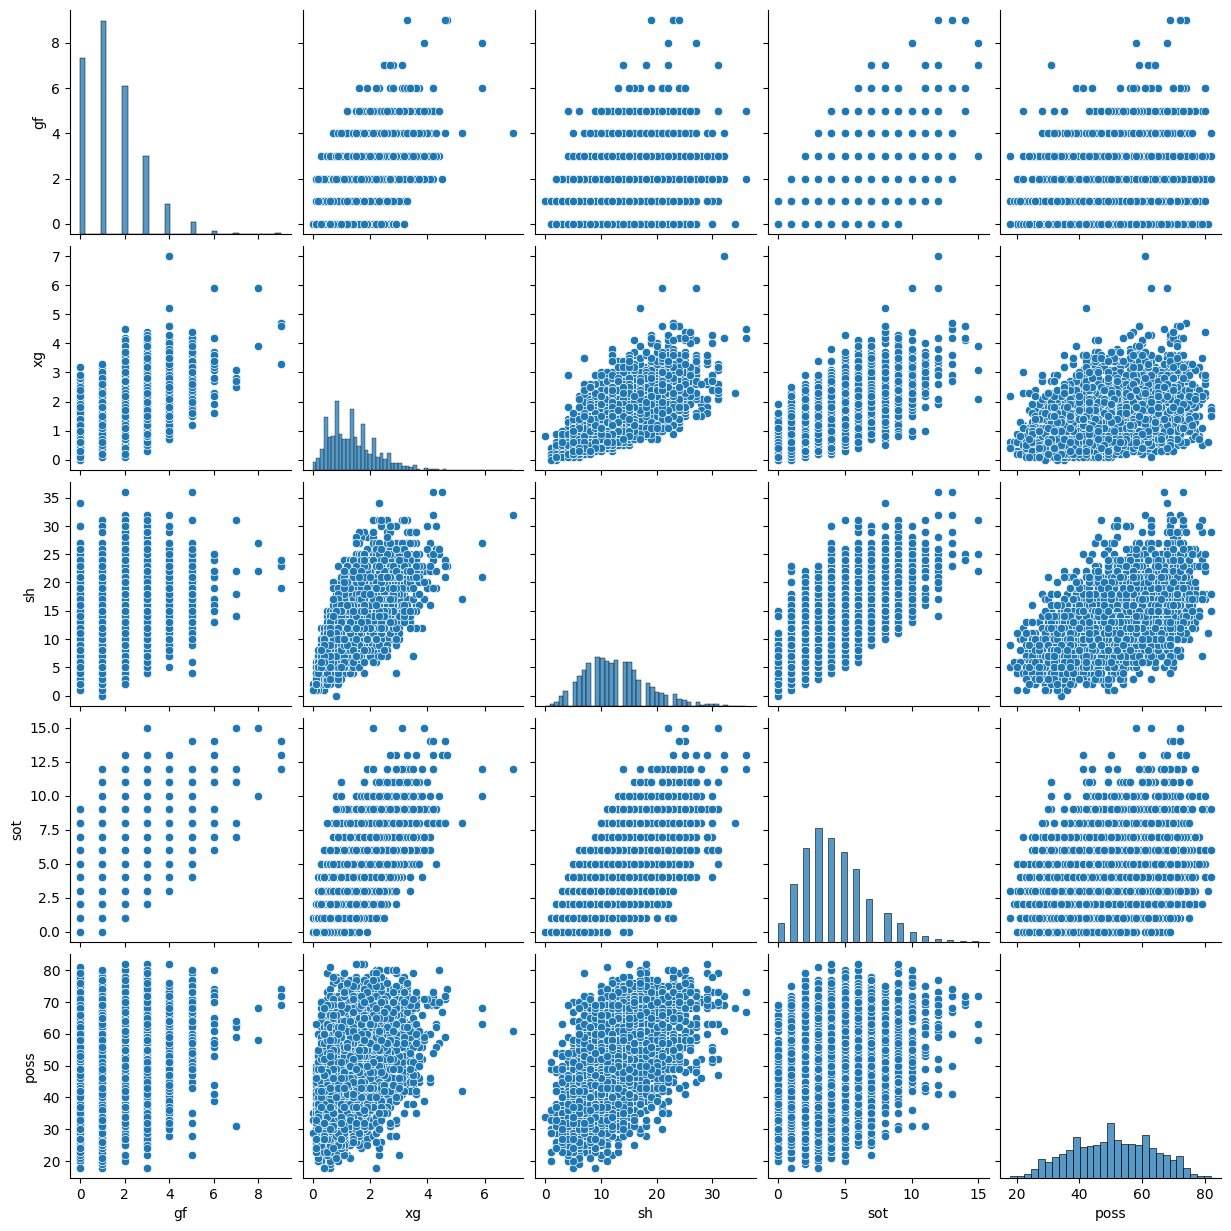

In [56]:
sns.pairplot(df[['gf', 'xg', 'sh', 'sot', 'poss']])
plt.show()